# Halo Mass Function Templates
## Zhuowen Zhang
## Created April 26, 2018

## Use P(M) from randomly selected halos in Buzzard 

In [1]:
import numpy as np

# import pyplot and set some parameters to make plots prettier
import matplotlib.pyplot as plt
from code.plot_utils import plot_pretty
plot_pretty()
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from code.halo_shape_calc import quad_moment
from code.lightcone_query_ra_dec import query_file, read_radial_bin
from code.setup.setup import data_home_dir
import pyfits
datadir = data_home_dir()


In [2]:
#Basic units, MKS
ang2rad = np.pi/180
kpc2m = 3.086e19
eV2j = 1.602e-19
yr2sec = 3.154e7
c = 2.99e8 #m/s
h  = 6.626e-34 #in eV
e = 4.8e-10 #Coulumbs
G = 6.674*10**(-11) #MKS
M_sun = 1.99e30 #kg, mass of sun


#### Import halo file and extract information 

In [3]:
halos_shape = np.load(datadir+'halos_shape_rand.npy')

#check properties of halos with shapes not converged
ind_not_conv = np.where(halos_shape['converge'] == False)
#print 'Redshift of unconverged halos are', halos_shape[ind_not_conv]['redshift']
#print 'Mass of unconverged halos are', halos_shape[ind_not_conv]['Mvir']

#print 'Positions not converge:', np.where(halos_shape['converge'] != 1)
conv_cut = np.where(halos_shape['converge']==True)
halos_shape = halos_shape[conv_cut]
halos_num = len(halos_shape)
#print 'After cut positions not converged:', np.where(halos_shape['converge'] != 1)
print 'Number of halos after cuts is ', halos_num
global ln_halos_M
ln_halos_M = np.log(halos_shape['Mvir'])
print np.min(ln_halos_M), 13*np.log(10)

Number of halos after cuts is  7581
29.934906 29.933606208922598


#### Python routine for mass function
Finds the probability density.
Input: log10 mass of halo
Output: probability density

In [4]:
'''
Finds from the random halos in Buzzard simulations (with z cutoff of z < 0.34) the 
approximate halo mass function. Outputs the density in each mass range, with the density uniform
in a mass range

Input:
lnM: Array of ln of halo masses 
num_bins: numbers of bins for the halo mass function. 10-20 for 7500 random halos appropriate with Sturgess' Law

Output:
lnM_density: Probability density for halo mass
'''

def P_lnM_Buzzard(lnM, num_bins):
    #Convert into array is logM is a number
    if len(np.shape(lnM))==0:
        lnM = lnM[np.newaxis]
    
    ln_M_max = np.max(ln_halos_M)
    ln_M_min = 13*np.log(10) #corresponding to cutoff at M > 1e13 M_sun
    lnM_bin_edge = np.linspace(ln_M_min, ln_M_max, num_bins+1).tolist()

    #Find probability in each mass bin
    lnM_density = np.histogram(ln_halos_M, lnM_bin_edge, density=True)[0]
    
    #Find the mass bin and the corresponding density.
    #For mass below the mass cutoff select smallest mass bin, for mass exceeding highest mass bin select highest mass bin
    lnM_bin_num = np.searchsorted(lnM_bin_edge, lnM) - 1

    
    lnM_bin_num[np.where(lnM_bin_num == -1)] += 1 #for mass below smallest
    lnM_bin_num[np.where(lnM_bin_num == num_bins)] -= 1 #for mass above highest 

    #print "lnM_density", lnM_density
    #print "lnM_bin_edge", lnM_bin_edge
    return lnM_density[lnM_bin_num]

## Testing the code


[1.01317784 0.7440351  0.59945428 0.47544844 0.35922771 0.27359138
 0.21131042 0.16571185 0.11677681 0.07840729 0.07173433 0.041706
 0.02279928 0.0111216  0.0055608  0.00611688 0.00166824 0.0027804
 0.00444864 0.00444864]


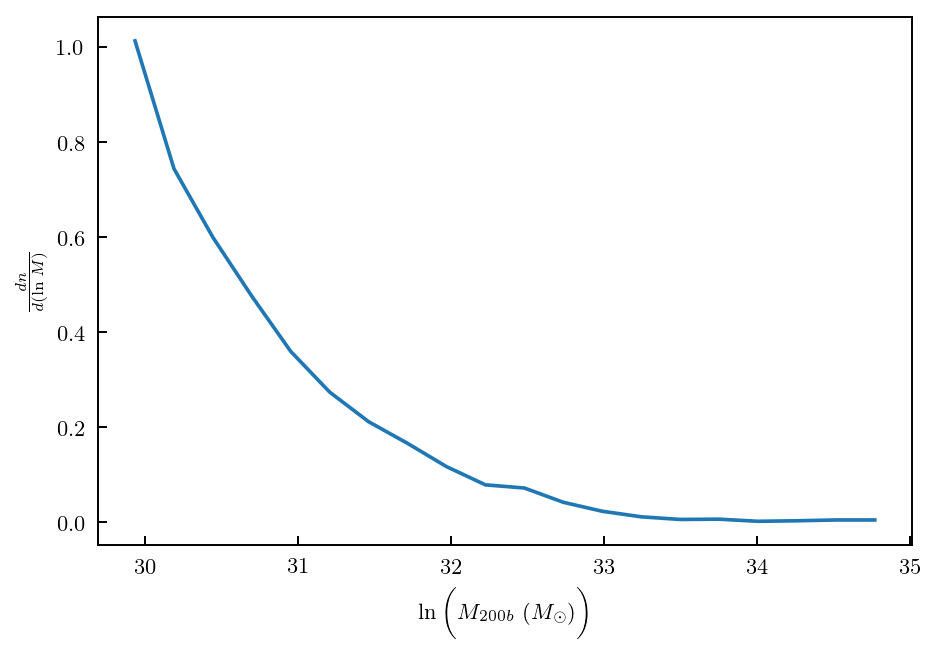

In [69]:
if __name__=="__main__":
#plot the halo mass function
    lnM_fake = np.linspace(13*np.log(10),15.1*np.log(10),20) 
    P_lnM_fake = P_lnM_Buzzard(lnM_fake,20)
    print P_lnM_fake
    plt.plot(lnM_fake, P_lnM_fake)
    plt.xlabel(r'$\ln\Big(M_{200b}~(M_\odot)\Big)$')
    plt.ylabel(r'$\frac{dn}{d(\ln{M})}$')
    plt.show()